# Dealing with Missing Data and Essential Data Cleaning in Pandas

## Topics Covered:

1. Dealing with Missing Data
2. Lambda Functions
3. Data Cleaning in Pandas (Outliers, Duplicates, etc.)
4. Pandas Groupby
5. Combining DataFrames With Pandas
6. Pivot Tables With Pandas
7. Practice Exercises

---

## 1. Dealing with Missing Data

### Why It Matters:

Imagine you're baking a cake and one of the ingredients is missing. You can either guess, replace it, or skip it - same thing in data. Missing data can lead to incorrect conclusions if not handled properly.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Detecting Missing Data:

In [2]:
df = pd.read_csv("./data/sales_data.csv")
print(df.isnull())        # Shows True for missing entries
print("\n")
print(df.isnull().sum())  # Counts missing values per column

   OrderID  Product  Category  Sales  Quantity  Region
0    False    False     False  False     False   False
1    False    False     False  False     False   False
2    False     True     False  False      True   False
3    False    False      True  False     False   False
4    False    False     False   True     False   False
5    False    False     False  False     False    True
6    False    False     False  False     False   False
7    False    False     False  False      True   False
8    False    False      True  False     False   False
9    False     True     False   True     False   False


OrderID     0
Product     2
Category    2
Sales       2
Quantity    2
Region      1
dtype: int64


###  Visualizing Missing Data

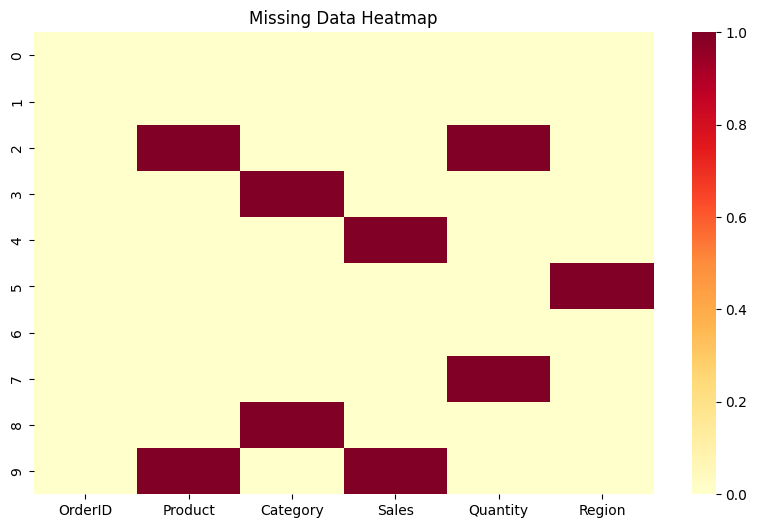

In [3]:
# Plot a heatmap to show missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="YlOrRd")
plt.title("Missing Data Heatmap")
plt.show()

### Handling Missing Data:

In [4]:
df_cleaned = df.dropna()                # Removes rows with missing values
df_filled = df.fillna(0)                # Replaces missing values with 0


df_numeric = df.select_dtypes(include=['number'])
df_filled_mean = df_numeric.fillna(df_numeric.mean())  # Replaces missing values with column mean

print("Original", df)
print("\n")
print("Cleaned", df_cleaned)
print("\n")
print("Replaced with 0",df_filled)
print("\n")
print("Replaced with mean",df_filled_mean)

Original    OrderID     Product     Category   Sales  Quantity Region
0     1001    Keyboard  Electronics   29.99       1.0   East
1     1002       Mouse  Electronics   19.99       2.0   East
2     1003         NaN  Electronics   49.99       NaN   West
3     1004      Laptop          NaN  999.99       1.0   West
4     1005     Monitor  Electronics     NaN       2.0  North
5     1006        Desk    Furniture  199.99       1.0    NaN
6     1007       Chair    Furniture   89.99       1.0  South
7     1008  Headphones  Electronics   29.99       NaN   East
8     1009       Mouse          NaN   19.99       2.0   East
9     1010         NaN    Furniture     NaN       1.0  North


Cleaned    OrderID   Product     Category  Sales  Quantity Region
0     1001  Keyboard  Electronics  29.99       1.0   East
1     1002     Mouse  Electronics  19.99       2.0   East
6     1007     Chair    Furniture  89.99       1.0  South


Replaced with 0    OrderID     Product     Category   Sales  Quantity Region

###  Visualizing Cleaned Data

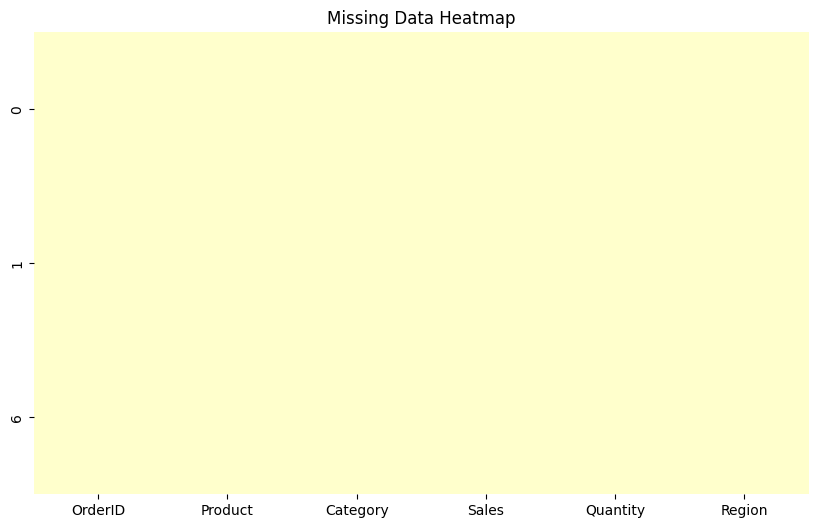

In [5]:
# Plot a heatmap to show missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Data Heatmap")
plt.show()

**Formula:**

```
Mean = (x1 + x2 + ... + xn) / n
```

**Python Equivalent:**

In [6]:
values = [10, 15, None, 20]
cleaned = [v for v in values if v is not None]
mean = sum(cleaned) / len(cleaned)

---

## 2. Lambda Functions

Lambda functions are small anonymous functions - perfect when you don't want to define a function just for one use.

### Example:

In [7]:
df["tax"] = df["Sales"].apply(lambda x: x * 0.1)

**Explanation:**

- `df["Sales"]`: selects the sales column.
- `.apply(lambda x: x * 0.1)`: applies a 10% tax to each value.

---

## 3. Data Cleaning in Pandas (Outliers, Duplicates, etc.)

### Removing Duplicates:

In [8]:
print(df.duplicated().sum())
df = df.drop_duplicates()

0


### Handling Outliers using IQR:

In [9]:
Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df["Sales"] >= Q1 - 1.5 * IQR) & (df["Sales"] <= Q3 + 1.5 * IQR)]

**Formula:**

```
Lower Bound = Q1 - 1.5 * IQR
Upper Bound = Q3 + 1.5 * IQR
```

**Python Code Breakdown:**

- Computes 1st and 3rd quartiles.
- Filters out values outside of the IQR range.

---

## 4. Pandas Groupby

Groupby helps you summarize data based on a column value.

### Example:

In [10]:
grouped = df.groupby("Category")["Sales"].sum()
print(grouped)

Category
Electronics    129.96
Furniture      289.98
Name: Sales, dtype: float64


- Groups data by "Category"
- Aggregates sales using `.sum()`

---

## 5. Combining DataFrames With Pandas

### Concatenating:

In [11]:
df1 = pd.read_csv("./data/data.csv")
df2 = pd.read_csv("./data/sales_data.csv")

In [12]:
df_combined = pd.concat([df1, df2])

df_combined

,OrderID,day,sales,Product,Category,Sales,Quantity,Region
0,1001,Monday,10.0,NaN,NaN,NaN,NaN,NaN
1,1003,Tuesday,15.0,NaN,NaN,NaN,NaN,NaN
2,1004,Wednesday,7.0,NaN,NaN,NaN,NaN,NaN
3,1005,Thursday,20.0,NaN,NaN,NaN,NaN,NaN
4,1007,Friday,13.0,NaN,NaN,NaN,NaN,NaN
0,1001,NaN,NaN,Keyboard,Electronics,29.99,1.0,East
1,1002,NaN,NaN,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,NaN,NaN,Electronics,49.99,NaN,West
3,1004,NaN,NaN,Laptop,NaN,999.99,1.0,West
4,1005,NaN,NaN,Monitor,Electronics,NaN,2.0,North


### Merging:

In [13]:
df_merged = pd.merge(df1, df2, on="OrderID")

df_merged

,OrderID,day,sales,Product,Category,Sales,Quantity,Region
0,1001,Monday,10,Keyboard,Electronics,29.99,1.0,East
1,1003,Tuesday,15,NaN,Electronics,49.99,NaN,West
2,1004,Wednesday,7,Laptop,NaN,999.99,1.0,West
3,1005,Thursday,20,Monitor,Electronics,NaN,2.0,North
4,1007,Friday,13,Chair,Furniture,89.99,1.0,South


- Combines data based on matching column `OrderID`



### Setting an Index

In [14]:
# Set OrderID as the index
df_merged.set_index('OrderID', inplace=True)
print(df_merged)

                day  sales   Product     Category   Sales  Quantity Region
OrderID                                                                   
1001         Monday     10  Keyboard  Electronics   29.99       1.0   East
1003        Tuesday     15       NaN  Electronics   49.99       NaN   West
1004      Wednesday      7    Laptop          NaN  999.99       1.0   West
1005       Thursday     20   Monitor  Electronics     NaN       2.0  North
1007         Friday     13     Chair    Furniture   89.99       1.0  South


## Types of Joins and Handling Column Name Collisions
When combining DataFrames, you can use different types of joins to control how rows are matched. If columns have the same name in both DataFrames (other than the join key), pandas will add suffixes to distinguish them.

### Types of Joins:
- **Inner Join**: Only rows with keys in both DataFrames are kept.
- **Left Join**: All rows from the left DataFrame, matched rows from the right.
- **Right Join**: All rows from the right DataFrame, matched rows from the left.
- **Outer Join**: All rows from both DataFrames, missing values filled with NaN.

### Handling Column Name Collisions:
If both DataFrames have columns with the same name (other than the join key), pandas will add `_x` and `_y` suffixes by default. You can customize these with the `suffixes` argument in `pd.merge`.

In [15]:
# Example DataFrames for joins
df_left = pd.DataFrame({
    'OrderID': [1, 2, 3],
    'Customer': ['Alice', 'Bob', 'Charlie'],
    'Amount': [100, 200, 150]
})
df_right = pd.DataFrame({
    'OrderID': [2, 3, 4],
    'Customer': ['Bob', 'Charlie', 'David'],
    'Amount': [210, 160, 180]
})

# Inner Join
inner = pd.merge(df_left, df_right, on='OrderID', how='inner', suffixes=('_left', '_right'))
print('Inner Join:')
print(inner)

# Left Join
left = pd.merge(df_left, df_right, on='OrderID', how='left', suffixes=('_left', '_right'))
print('\nLeft Join:')
print(left)

# Right Join
right = pd.merge(df_left, df_right, on='OrderID', how='right', suffixes=('_left', '_right'))
print('\nRight Join:')
print(right)

# Outer Join
outer = pd.merge(df_left, df_right, on='OrderID', how='outer', suffixes=('_left', '_right'))
print('\nOuter Join:')
print(outer)

# Note how columns with the same name (e.g., Customer, Amount) get suffixes to avoid collisions.

Inner Join:
   OrderID Customer_left  Amount_left Customer_right  Amount_right
0        2           Bob          200            Bob           210
1        3       Charlie          150        Charlie           160

Left Join:
   OrderID Customer_left  Amount_left Customer_right  Amount_right
0        1         Alice          100            NaN           NaN
1        2           Bob          200            Bob         210.0
2        3       Charlie          150        Charlie         160.0

Right Join:
   OrderID Customer_left  Amount_left Customer_right  Amount_right
0        2           Bob        200.0            Bob           210
1        3       Charlie        150.0        Charlie           160
2        4           NaN          NaN          David           180

Outer Join:
   OrderID Customer_left  Amount_left Customer_right  Amount_right
0        1         Alice        100.0            NaN           NaN
1        2           Bob        200.0            Bob         210.0
2        3  

---

## 6. Pivot Tables With Pandas

Pivot tables give you a summary of the data in matrix form.

### Example:

In [16]:
pivot = df.pivot_table(values="Sales", index="Category", aggfunc="sum")
print(pivot)

              Sales
Category           
Electronics  129.96
Furniture    289.98


- Shows total sales per category

---

## 7. Practice Exercises

1. Load a CSV file and identify missing data.
2. Fill missing values using the column mean.
3. Create a lambda function to apply a discount of 20%.
4. Identify and remove duplicate rows.
5. Use IQR to remove outliers in a numeric column.
6. Group sales by region using `groupby()`.
7. Merge two DataFrames with a common key.
8. Create a pivot table summarizing sales by product.

---

## Summary

- Handling missing data is a foundational step in analysis.
- Lambda functions offer concise custom transformations.
- Cleaning involves removing noise: outliers, duplicates, nulls.
- Grouping and combining let you reorganize data.
- Pivot tables let you summarize information neatly.

Next step: Try applying these skills to a messy real-world dataset. Clean it, organize it, and extract meaningful insights.

[Slides](https://docs.google.com/presentation/d/1W39QO-6y_y5W73n17HfY3AFU8NUNJLtkO532qgCp5hI/edit?usp=sharing)